<div style="text-align: right"> 06.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (1 + 2) numerisch für $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Wählen Sie für die Länge des Pendels $L=1$, die Masse $m=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()`, `np.sin()`

In [5]:
import numpy as np

dt=0.004
g=9.81
l=1
m=1
n=2000
phi=np.pi/4
phi_t1=np.array([phi])
phi_t2=np.array([phi])
w=0
w_t1=np.array([w])


for i in range (0,n):
    phinew=phi+w*dt
    wnew=w-(g/l)*np.sin(phi)*dt
    
    phi=phinew
    w=wnew
    phi_t1=np.append(phi,phi_t1)
    w_t1=np.append(w,w_t1)
phi_t=np.flip(phi_t1,0)
w_t=np.flip(w_t1,0)



## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [2]:
import numpy as np
h=l*(1-np.cos(phi_t))

def epot(i): ##potenzielle Energie
    return m*g*(1-np.cos(phi_t[i]))

def ekin(i): ##kintetische Energie
    return (m/2)*(l**2)*((w_t[i])**2)

def eges(i):
    return (epot(i))+(ekin(i))

print(ekin(100))

2.5123484821410242


**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

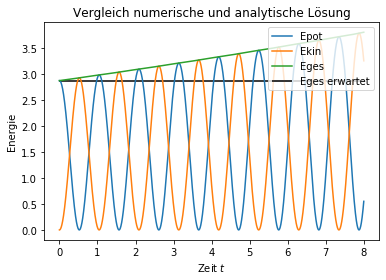

In [7]:
import matplotlib.pyplot as plt
import math


t=np.arange(0,n*dt+dt,dt)
epot_t=m*g*(1-np.cos(phi_t))
ekin_t=(m/2)*(l**2)*((w_t)**2)
egesnumeric=epot_t+ekin_t
egesanalytic=m*g*l*(1-np.cos((np.pi)/4))

fig, ax = plt.subplots()
ax.set_title("Vergleich numerische und analytische Lösung")
ax.plot(t,epot_t, label="Epot")
ax.plot(t,ekin_t, label="Ekin")
ax.plot(t,egesnumeric, label="Eges")
ax.hlines(egesanalytic, 0, n*dt, label="Eges erwartet")
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Energie")
plt.legend(loc=1)

In [12]:
print("Die Gesamtenergie steigt linear an, und somit auch die Differenz zur konstanten erwarteten Gesamtenergie")
print("Grund der Abweichung:")
print("Wie schon in HA 6 beobachtet, steigt die Amplitude der Schwingung bei Integration mit dem Euler-Vefahren allmählich.")
print("Das bedeutet, dass sich die potentielle Energie mit der Zeit erhöht, was selbstverständlich im Widerspruch zur")
print("Energieerhaltung steht. Somit werden die Nachteile des Eulerverfahrens hier umso deutlicher.")

Die Gesamtenergie steigt linear an, und somit auch die Differenz zur konstanten erwarteten Gesamtenergie
Grund der Abweichung:
Wie schon in HA 6 beobachtet, steigt die Amplitude der Schwingung bei Integration mit dem Euler-Vefahren allmählich.
Das bedeutet, dass sich die potentielle Energie mit der Zeit erhöht, was selbstverständlich im Widerspruch zur
Energieerhaltung steht. Somit werden die Nachteile des Eulerverfahrens hier umso deutlicher.
